In [1]:
import sys
from qutip_simulation_functions import *
import numpy as np
import qutip as qt

%matplotlib inline

In [2]:
g = qt.basis(2,0)
e = qt.basis(2,1)

psi0 = g

b = qt.destroy(2)

qubit_x = qt.sigmax()
qubit_y = qt.sigmay()
qubit_z = qt.sigmaz()
omega = 0.1 * np.ones(100)
tlist = np.linspace(0,100,100)

e_ops = [qubit_x, qubit_y, qubit_z]
c_ops = []

free_H = qt.Qobj([[0,0],[0,0]])

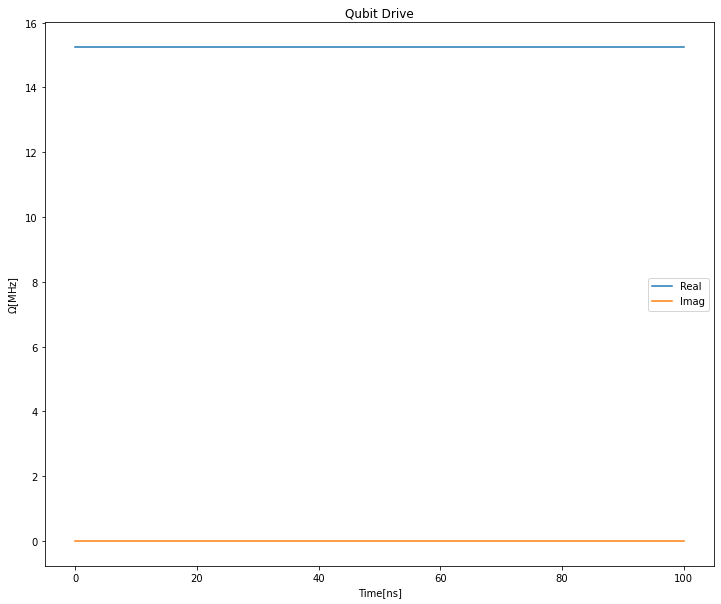

In [3]:
H_tot = driven_hamiltonian(omega=omega, free_hamiltonian=free_H, qubit_x = qubit_x, qubit_y = qubit_y, plot=True)

In [4]:
res = qt.mesolve(H_tot,psi0,tlist,c_ops=c_ops, e_ops=e_ops, options=qt.Options(store_states=True))

In [5]:
bvec_array = [res.expect[0],res.expect[1],res.expect[2]]

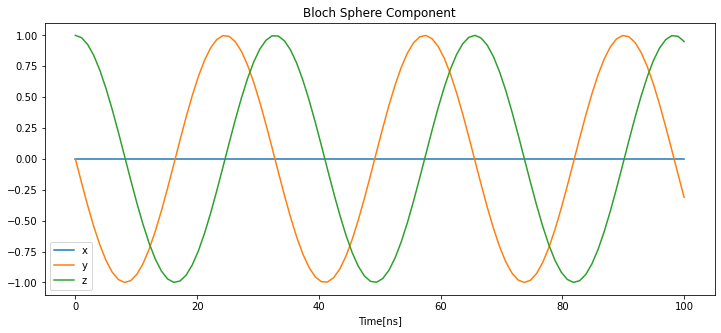

In [6]:
plot_bloch_vector_component(tlist=tlist, bloch_array=bvec_array)

In [7]:
animate_bloch(vector_array = bvec_array)

IndexError: list index out of range

AttributeError: 'Arrow3D' object has no attribute 'do_3d_projection'

<Figure size 432x288 with 1 Axes>

C:\Users\user\AppData\Local\Temp\ipykernel_95680\825212214.py:5: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig,azim=-40,elev=30)


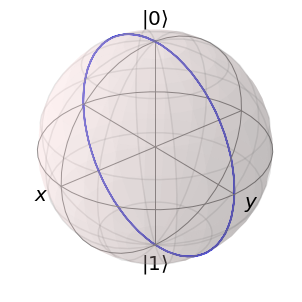

In [9]:
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
import pylab as plab
fig = plab.figure()
ax = Axes3D(fig,azim=-40,elev=30)
sphere = qt.Bloch(axes=ax)
b = qt.Bloch()
pt = bvec_array
b.add_points(pt)

def animate(i):
  sx, sy, sz = pt
  sphere.clear()
  sphere.add_points([sx[:i+1],sy[:i+1],sz[:i+1]], meth='l')
  sphere.make_sphere()

  return ax

def init():

    return ax

ani = animation.FuncAnimation(fig, animate, np.arange(len(pt[0])), init_func=init, blit=False, repeat=False)

ani.save('on_resonance2.gif', fps=20)